### Predict Stock Price of Google(Making a LSTM)

#### Work on 5 years(2012 Jan to 2016 Dec) of data to predict (2017 Jan Stock Price)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#Importing Training set
train_data = pd.read_csv("Google_Stock_Price_Train.csv")

In [37]:
#Check the head of the data
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [38]:
#Taking Open col as np array
training_set = train_data.iloc[:, 1:2].values

In [39]:
type(training_set)

numpy.ndarray

### Feature Scaling

In [40]:
#Mostly, in RNN, we use Normalization
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
scaled_data = scaler.fit_transform(training_set)

In [43]:
scaled_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [44]:
#if we take wrong 60 timesteps,it may overfit / it'll give non-sense predictions
#60 timesteps means -> at time t, RNN sees previous 60 Stock Prices

In [45]:
X_train = []
y_train = []

In [46]:
for i in range(60, 1258):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i,0])
    
#Make the X_train, y_train as np arrays as RNN takes as np arrays only
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Reshaping

In [48]:
#No. of predictors we use to predict
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))#1->We are using only Open col of the dataset
#(batch_size, timesteps, dimensions)

### Building RNN

In [49]:
#Importing keras libraries & packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [50]:
#Initializing the RNN
regressor = Sequential()

In [51]:
#Adding the 1st LSTM layer and Dropout Regularization(To avoid overfitting)
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#Relavant units = lead us to better result
regressor.add(Dropout(rate=0.2))

In [52]:
#Adding 2nd LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

In [53]:
#Adding 3rd LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate=0.2))

In [54]:
#Adding 4th LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [55]:
#Adding output layer
regressor.add(Dense(units = 1))

### Compiling and Fitting RNN to training data

In [56]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #rmsprop is recommended for RNN

In [57]:
#Fitting RNN to training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0436
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0063
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 7s 5ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014


### Making the predictions and Visualizing

In [58]:
#Get the real stock price in 2017(Jan)
test_data = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_data.iloc[:,1:2].values

In [59]:
#check the head
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [61]:
#Prediction
#To make predictions, actually we need previous 60 days of data.
#So, we concatenate both training and test data
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

#Get previous 60 days
inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values

#Reshape the inputs
inputs = inputs.reshape(-1,1)

inputs = scaler.transform(inputs)

In [62]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [63]:
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [64]:
#Prediction
pred_stock_price = regressor.predict(X_test)

In [65]:
#inverse the scaling of predictions
pred_stock_price = scaler.inverse_transform(pred_stock_price)

In [66]:
pred_stock_price

array([[780.3619 ],
       [777.54425],
       [777.1073 ],
       [778.0847 ],
       [781.2147 ],
       [787.0398 ],
       [792.9774 ],
       [796.1974 ],
       [797.1624 ],
       [796.9047 ],
       [796.245  ],
       [795.521  ],
       [794.991  ],
       [795.2453 ],
       [796.1038 ],
       [800.30536],
       [807.1035 ],
       [814.9248 ],
       [819.97363],
       [817.3037 ]], dtype=float32)

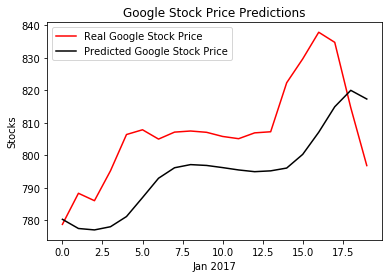

In [76]:
#Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price');
plt.plot(pred_stock_price, color = 'black', label = 'Predicted Google Stock Price');
plt.title('Google Stock Price Predictions')
plt.xlabel('Jan 2017')
plt.ylabel('Stocks')
plt.legend()
plt.show()